In [468]:
## importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [469]:
## importando a base de dados

base = pd.read_csv('/content/Base_ScoreCredito_QuantumFinance(1).csv', decimal= ',', sep=';')
pd.options.display.float_format = '{:.2f}'.format

In [470]:
base.head() ## verificando a base

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30
2,708084558,46,M,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00
3,708085458,34,F,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40
4,708086958,49,F,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00


In [471]:
## retirando a coluna 'id'

base.drop(columns='id', inplace=True)

In [472]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                10127 non-null  int64  
 1   sexo                 10127 non-null  object 
 2   estado_civil         10127 non-null  object 
 3   escola               10127 non-null  object 
 4   Qte_dependentes      10127 non-null  int64  
 5   tempo_ultimoservico  10127 non-null  int64  
 6   trabalha             10127 non-null  int64  
 7   vl_salario_mil       10127 non-null  float64
 8   reg_moradia          10127 non-null  int64  
 9   casa_propria         10127 non-null  int64  
 10  vl_imovel_em_mil     10127 non-null  int64  
 11  Qte_cartoes          10127 non-null  int64  
 12  Qte_carros           10127 non-null  int64  
 13  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Primeiro vamos tratar os dados

In [473]:
## verificando dados nulos.

base.isna().sum()

idade                  0
sexo                   0
estado_civil           0
escola                 0
Qte_dependentes        0
tempo_ultimoservico    0
trabalha               0
vl_salario_mil         0
reg_moradia            0
casa_propria           0
vl_imovel_em_mil       0
Qte_cartoes            0
Qte_carros             0
SCORE_CREDITO          0
dtype: int64

In [474]:
## retirando colunas e linhas com valores vázios.

base.dropna(inplace=True)
base.dropna(axis=1, inplace=True)

## substituindo os estados civis que estão como 'na' para 'solteiro'

base['estado_civil'].replace('na', 'solteiro', inplace=True)

In [475]:
base.describe()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,1.55,34.13,0.91,70.21,3.78,0.35,209.00,1.08,0.62,469.50
std,8.02,1.49,8.22,0.28,55.57,1.58,0.48,378.50,0.33,0.57,133.81
min,26.00,0.00,7.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,162.00
25%,41.00,0.00,30.00,1.00,21.33,3.00,0.00,0.00,1.00,0.00,375.00
50%,46.00,1.00,34.00,1.00,66.49,4.00,0.00,0.00,1.00,1.00,449.60
75%,52.00,3.00,39.00,1.00,107.54,5.00,1.00,289.00,1.00,1.00,540.90
max,73.00,5.00,57.00,1.00,233.30,6.00,1.00,1800.00,4.00,2.00,979.65


## Tratando as variaveis categóricas

In [476]:
# convertendo variaveis categoricas com dummy.

# vairaveis dummy para sexo
sexo_dummies = pd.get_dummies(base['sexo'], prefix = 'Sexo',  dtype=int)

base = pd.concat([base, sexo_dummies], axis=1)

In [477]:
base.head() ## verificando a base


,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,Sexo_F,Sexo_M
0,45,F,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00,1,0
1,58,M,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30,0,1
2,46,M,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00,0,1
3,34,F,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40,1,0
4,49,F,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00,1,0


In [478]:
# percebam que aqui estamos excluindo a variável categórica sexo, pois já criamos outra coluna binária com a mesma variavel.

base.drop(['sexo'], axis=1, inplace=True)
base.drop(['Sexo_M'], axis=1, inplace=True)
display(base.head())

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,Sexo_F
0,45,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00,1
1,58,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30,0
2,46,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00,0
3,34,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40,1
4,49,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00,1


In [479]:
# convertendo variaveis categoricas com dummy.

# vairaveis dummy para estado civil.

estado_civil_dummies = pd.get_dummies(base['estado_civil'], prefix = 'estado_civil_',  dtype=int)

base = pd.concat([base, estado_civil_dummies], axis=1)

In [480]:
# convertendo variaveis categoricas com dummy.

# vairaveis dummy para escolaridade

escola_dummies = pd.get_dummies(base['escola'], prefix = 'escolaridade_',  dtype=int)

base = pd.concat([base, escola_dummies], axis=1)

In [481]:
# convertendo variaveis categoricas com dummy.

# vairaveis dummy para região de moradia

reg_dummies = pd.get_dummies(base['reg_moradia'], prefix = 'regia_',  dtype=int)

base = pd.concat([base, reg_dummies], axis=1)

In [482]:
base.head() ## verificando a base

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,...,escolaridade__ensino fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__1,regia__2,regia__3,regia__4,regia__5,regia__6
0,45,casado,graduacao,3,40,1,40.09,3,0,0,...,0,0,1,0,0,0,1,0,0,0
1,58,solteiro,ensino fundam,0,44,1,66.56,3,0,0,...,1,0,0,0,0,0,1,0,0,0
2,46,divorciado,doutorado,3,35,1,123.68,6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34,solteiro,mestrado,0,22,1,19.72,6,0,0,...,0,0,0,1,0,0,0,0,0,1
4,49,casado,mestrado,2,36,0,0.00,3,1,437,...,0,0,0,1,0,0,1,0,0,0


In [483]:
# excluindo as colunas estado_civil, escola e reg_moradia, pois criamos outra colunas binarias para representar essas variaveis categoricas.

base.drop(['estado_civil'], axis=1, inplace=True)
base.drop(['escola'], axis=1, inplace=True)
base.drop(['reg_moradia'], axis=1, inplace=True)
display(base.head())

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__1,regia__2,regia__3,regia__4,regia__5,regia__6
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,0,1,0,0,0,1,0,0,0
1,58,0,44,1,66.56,0,0,1,0,276.30,...,1,0,0,0,0,0,1,0,0,0
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,0,1
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,0,1,0,0,0,0,0,1
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,0,1,0,0,1,0,0,0


In [484]:
## mudando o nome das região, conforme está indicado no documento da atividade.

novos_nomes = {
    'regia__1': 'regia__A',
    'regia__2': 'regia__B',
    'regia__3': 'regia__C',
    'regia__4': 'regia__D',
    'regia__5': 'regia__E',
    'regia__6': 'regia__F',

}

base.rename(columns=novos_nomes, inplace=True)

In [485]:
## corrigindo o nome da coluna, pois foi criada com espaço.

base.rename(columns={'escolaridade__ensino fundam' : 'escolaridade__ensino_fundam'}, inplace=True)

In [486]:
base  ## verificando a base.

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino_fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,0,1,0,0,0,1,0,0,0
1,58,0,44,1,66.56,0,0,1,0,276.30,...,1,0,0,0,0,0,1,0,0,0
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,0,1
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,0,1,0,0,0,0,0,1
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,0,1,0,0,0,1,0,0
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,1,0,0,0,0,0,0,0,0,1
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,0,1,0,0,0,1,0,0,0
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,0,1,0,0,0,0,0,1,0,0


## Arrumando os valores de salários

In [487]:
## convertendo o salario anual para salario por mes e criando uma coluna.

salario_mes = base['vl_salario_mil'] / 12
base['salario_mes'] = salario_mes.round(3)

In [488]:
## arredondando os valores de salario e imoveis

base['vl_salario_mil'] = base['vl_salario_mil'].round(3)
base['vl_imovel_em_mil'] = base['vl_imovel_em_mil'].round(3)

In [489]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        10127 non-null  int64  
 1   Qte_dependentes              10127 non-null  int64  
 2   tempo_ultimoservico          10127 non-null  int64  
 3   trabalha                     10127 non-null  int64  
 4   vl_salario_mil               10127 non-null  float64
 5   casa_propria                 10127 non-null  int64  
 6   vl_imovel_em_mil             10127 non-null  int64  
 7   Qte_cartoes                  10127 non-null  int64  
 8   Qte_carros                   10127 non-null  int64  
 9   SCORE_CREDITO                10127 non-null  float64
 10  Sexo_F                       10127 non-null  int64  
 11  estado_civil__casado         10127 non-null  int64  
 12  estado_civil__divorciado     10127 non-null  int64  
 13  estado_civil__so

In [490]:
base

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,1,0,0,0,1,0,0,0,3.34
1,58,0,44,1,66.56,0,0,1,0,276.30,...,0,0,0,0,0,1,0,0,0,5.55
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,1,10.31
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,1,0,0,0,0,0,1,1.64
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,1,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,1,0,0,0,1,0,0,8.34
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,0,0,0,0,0,0,0,0,1,7.48
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,1,0,0,0,1,0,0,0,1.65
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,1,0,0,0,0,0,1,0,0,16.23


# Vamos realizar a Análise descritiva das variáveis

In [491]:
base.count() ## contamos os valores

idade                          10127
Qte_dependentes                10127
tempo_ultimoservico            10127
trabalha                       10127
vl_salario_mil                 10127
casa_propria                   10127
vl_imovel_em_mil               10127
Qte_cartoes                    10127
Qte_carros                     10127
SCORE_CREDITO                  10127
Sexo_F                         10127
estado_civil__casado           10127
estado_civil__divorciado       10127
estado_civil__solteiro         10127
escolaridade__doutorado        10127
escolaridade__ensino_fundam    10127
escolaridade__ensino medio     10127
escolaridade__graduacao        10127
escolaridade__mestrado         10127
regia__A                       10127
regia__B                       10127
regia__C                       10127
regia__D                       10127
regia__E                       10127
regia__F                       10127
salario_mes                    10127
dtype: int64

In [492]:
base.describe().round(1).T

## aqui já podemos obter as principais análises descritivas

,count,mean,std,min,25%,50%,75%,max
idade,10127.00,46.30,8.00,26.00,41.00,46.00,52.00,73.00
Qte_dependentes,10127.00,1.50,1.50,0.00,0.00,1.00,3.00,5.00
tempo_ultimoservico,10127.00,34.10,8.20,7.00,30.00,34.00,39.00,57.00
trabalha,10127.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
vl_salario_mil,10127.00,70.20,55.60,0.00,21.30,66.50,107.50,233.30
casa_propria,10127.00,0.40,0.50,0.00,0.00,0.00,1.00,1.00
vl_imovel_em_mil,10127.00,209.00,378.50,0.00,0.00,0.00,289.00,1800.00
Qte_cartoes,10127.00,1.10,0.30,1.00,1.00,1.00,1.00,4.00
Qte_carros,10127.00,0.60,0.60,0.00,0.00,1.00,1.00,2.00
SCORE_CREDITO,10127.00,469.50,133.80,162.00,375.00,449.60,540.90,979.60


# Tratando Outliers

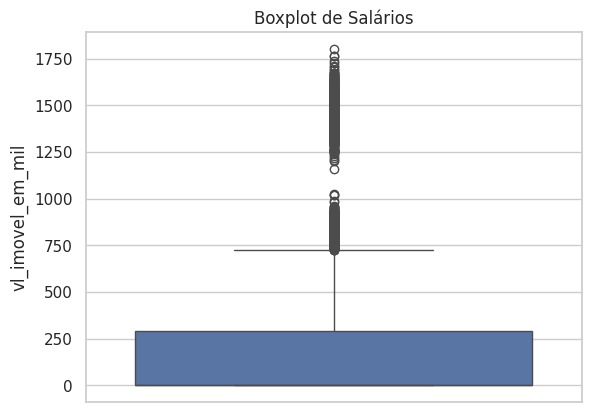

In [493]:
## aqui notamos muitos outliers em relação a vari

sns.boxplot(y=base['vl_imovel_em_mil'])
plt.title('Boxplot de Salários')
plt.show()

## Criando vários boxplots para verificar os outliers

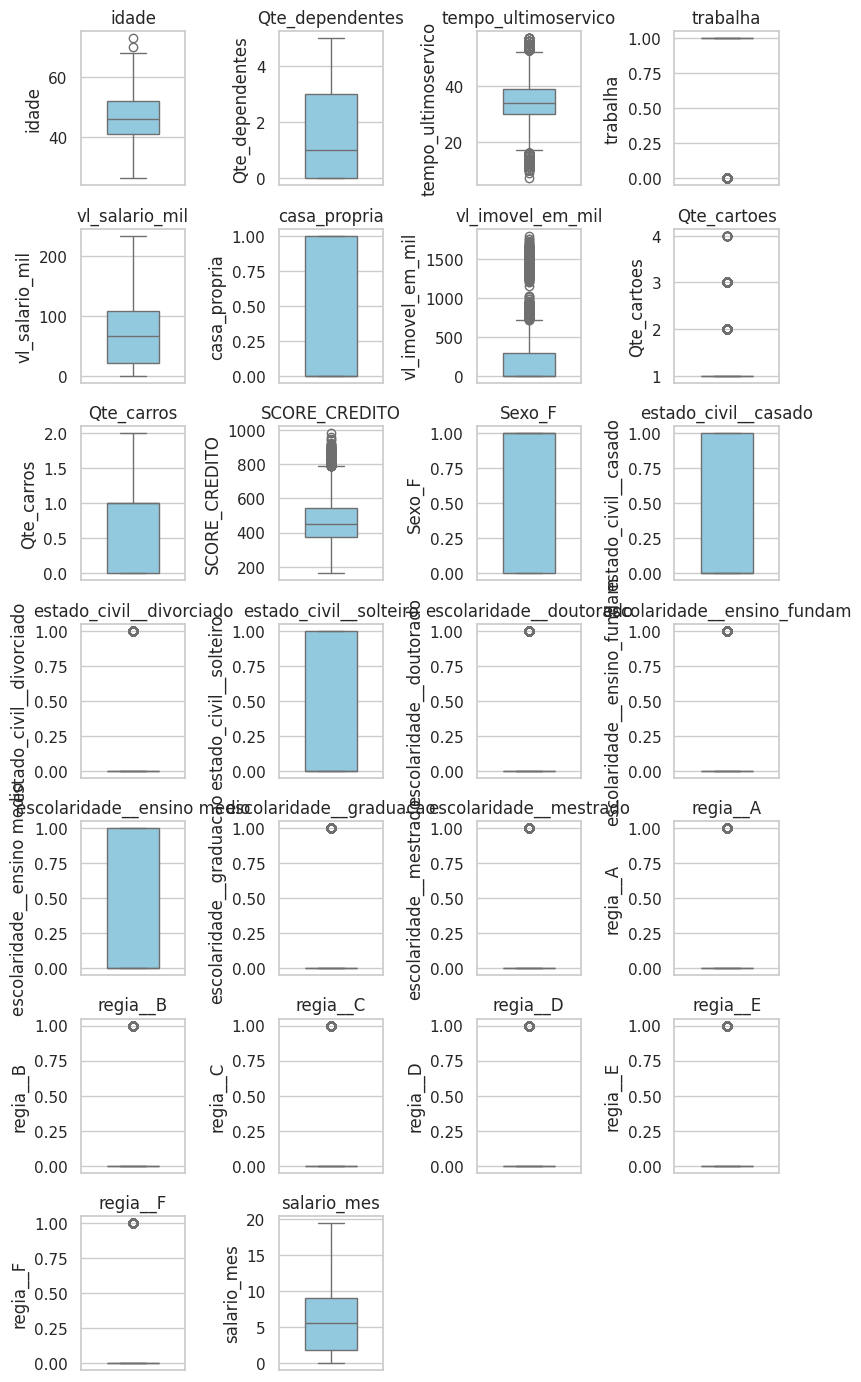

In [494]:
sns.set(style="whitegrid")

# Calculando o númereo de colunas no df.
num_cols = len(base.columns)

# Calculando o número de linhas necessárias para exibir todos os boxplots
num_rows = (num_cols + 3) // 4  # Arredondando para cima

# Configurando os boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(8, 2 * num_rows))
axes = axes.flatten()

# Iterando e criandos os boxplots
for i, col in enumerate(base.columns):
    sns.boxplot(y=base[col], ax=axes[i], width=0.5, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')

#es
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Ajustando o layout
plt.tight_layout()
plt.show()

Identificamos possíveis Outliers, contudo decidimos não trata-los, pois devido ser um cenário de score e valores, podem representar possíveis tendências.

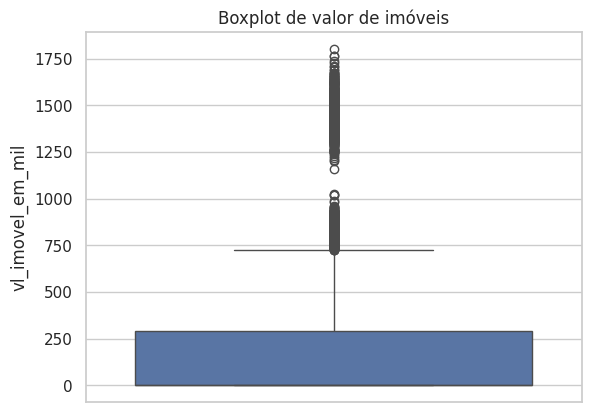

In [495]:
## caso de outlier.

sns.boxplot(y=base['vl_imovel_em_mil'])
plt.title('Boxplot de valor de imóveis')
plt.show()

# Separando númericos e qualitativos

In [496]:
## separando as colunas númericas

base_numericos = base[['SCORE_CREDITO', 'salario_mes', 'vl_imovel_em_mil', 'idade', 'tempo_ultimoservico', 'Qte_dependentes', 'Qte_cartoes', 'Qte_carros' ]]
base_numericos

,SCORE_CREDITO,salario_mes,vl_imovel_em_mil,idade,tempo_ultimoservico,Qte_dependentes,Qte_cartoes,Qte_carros
0,778.00,3.34,0,45,40,3,1,1
1,276.30,5.55,0,58,44,0,1,0
2,401.00,10.31,0,46,35,3,1,1
3,347.40,1.64,0,34,22,0,1,0
4,476.00,0.00,437,49,36,2,1,2
...,...,...,...,...,...,...,...,...
10122,470.00,8.34,0,50,45,0,1,0
10123,432.00,7.48,0,38,31,0,1,1
10124,406.00,1.65,252,49,43,3,1,1
10125,387.00,16.23,0,54,48,4,1,1


In [497]:
## verificando a média dos dados

base_numericos.mean()

SCORE_CREDITO         469.50
salario_mes             5.85
vl_imovel_em_mil      209.00
idade                  46.33
tempo_ultimoservico    34.13
Qte_dependentes         1.55
Qte_cartoes             1.08
Qte_carros              0.62
dtype: float64

In [498]:
## verificando o desvio dos dados

base_numericos.std()

SCORE_CREDITO         133.81
salario_mes             4.63
vl_imovel_em_mil      378.50
idade                   8.02
tempo_ultimoservico     8.22
Qte_dependentes         1.49
Qte_cartoes             0.33
Qte_carros              0.57
dtype: float64

In [499]:
## verificando a variância dos dados

print(base_numericos.var())

SCORE_CREDITO          17906.36
salario_mes               21.44
vl_imovel_em_mil      143258.64
idade                     64.27
tempo_ultimoservico       67.59
Qte_dependentes            2.22
Qte_cartoes                0.11
Qte_carros                 0.32
dtype: float64


In [500]:
# Amplitude dos dados
range_values = base_numericos.max() - base_numericos.min()
print(range_values)

SCORE_CREDITO          817.65
salario_mes             19.44
vl_imovel_em_mil      1800.00
idade                   47.00
tempo_ultimoservico     50.00
Qte_dependentes          5.00
Qte_cartoes              3.00
Qte_carros               2.00
dtype: float64


# Gráficos e Análises

Credit Score variam de 300 a 850, onde uma pontuação mais alta indica menor risco de inadimplência.

Definição de Inadimplência: Estabelecimento de um limite de pontuação abaixo do qual um indivíduo é considerado de alto risco. Por exemplo, indivíduos com uma pontuação abaixo de 600 podem ser considerados de alto risco de inadimplência.

In [501]:
## media e desvio padrão

print('média da variável SCORE_CREDITO', np.mean(base['SCORE_CREDITO']))
print('desvio da variável SCORE_CREDITO', np.std(base['SCORE_CREDITO']))

média da variável SCORE_CREDITO 469.5003638787401
desvio da variável SCORE_CREDITO 133.8080456278093


## Distribuições

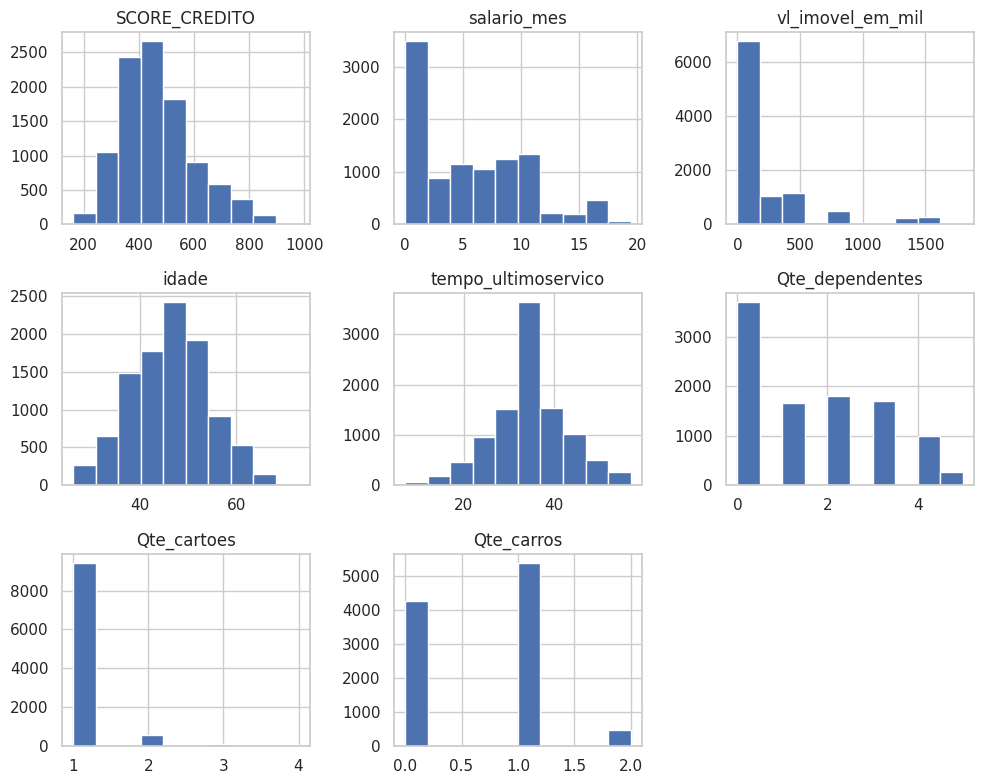

In [502]:
base_numericos.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

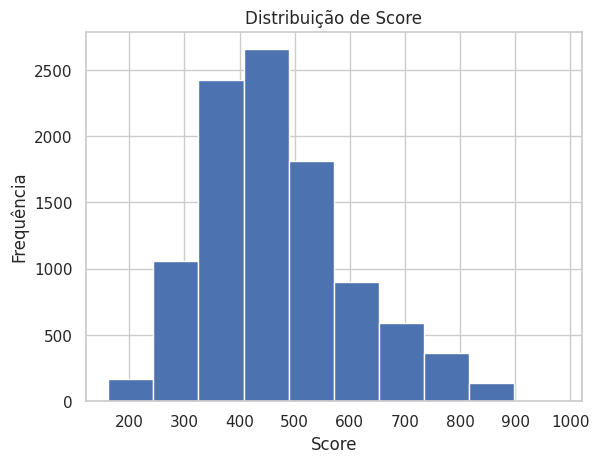

In [503]:
## Podemos ver visualmente que a maior parte da população tem um Score entre 400 à 500.
base['SCORE_CREDITO'].hist()
plt.title('Distribuição de Score')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.show()

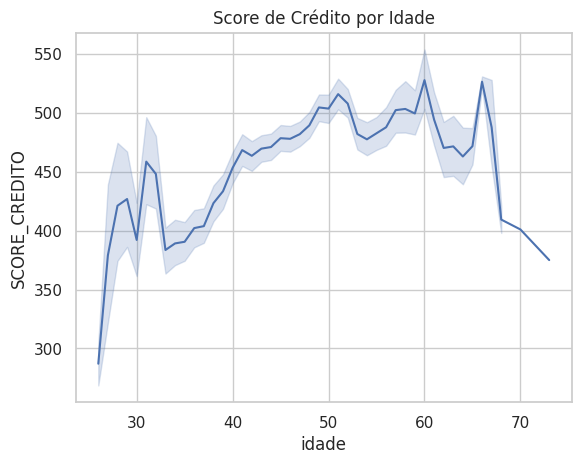

In [504]:
# Criando um gráfico de linha.

## verificando visualmente o score por idade.

sns.lineplot(data=base, x='idade', y='SCORE_CREDITO')
plt.title('Score de Crédito por Idade')
plt.show()

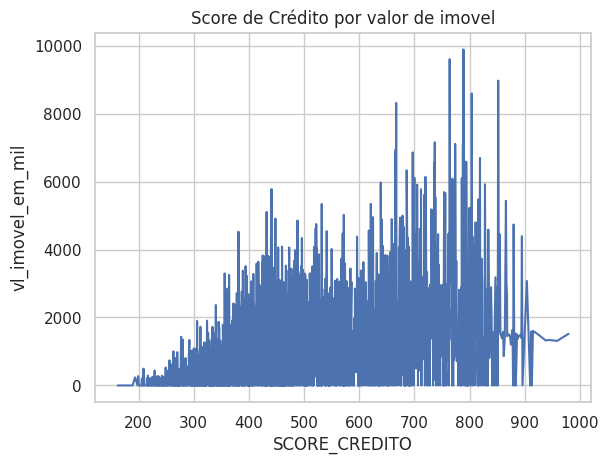

In [505]:
## grafico de linha de relação de score por valor de imovel.

dados = base.groupby('SCORE_CREDITO')['vl_imovel_em_mil'].sum()
sns.lineplot(data=dados)
plt.title('Score de Crédito por valor de imovel')
plt.show()

Text(0, 0.5, 'salario_mes')

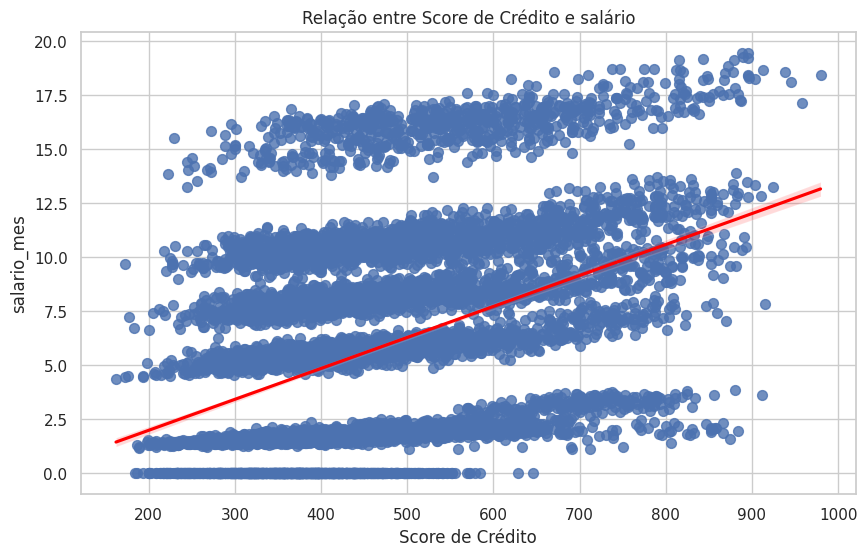

In [506]:
## grafico de linha de relação de score por valor de imovel.

plt.figure(figsize=(10, 6))

# Criar o gráfico de dispersão
sns.regplot(x='SCORE_CREDITO', y='salario_mes', data=base, scatter_kws={"s": 50}, line_kws={"color": "red"})

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Score de Crédito e salário')
plt.xlabel('Score de Crédito')
plt.ylabel('salario_mes')

## Análises de dados qualitativos binários

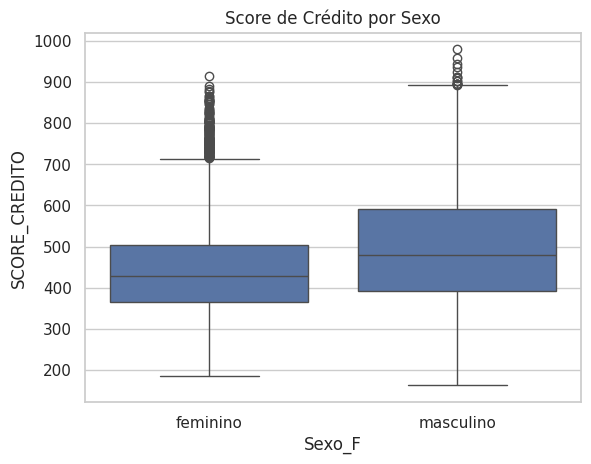

In [507]:
# Boxplot para variáveis numéricas

# Criando o gráfico com seaborn, mapeando os valores de Sexo_M diretamente no parâmetro x.

## aqui identificamos visualmente a diferença de score por sexo.

sns.boxplot(x=base['Sexo_F'].map({1: 'feminino', 0: 'masculino'}), y='SCORE_CREDITO', data=base)
plt.title('Score de Crédito por Sexo')
plt.show()

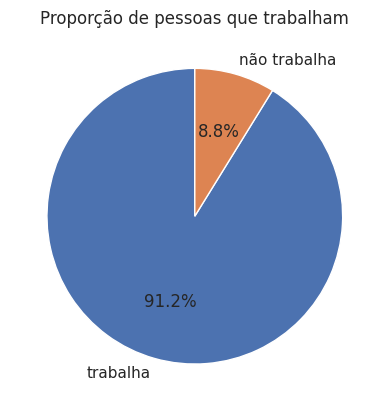

In [508]:
## gráfico de pizza de proporção de pessoas que trabalham.

base['trabalha'].map({1: 'trabalha', 0: 'não trabalha'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de pessoas que trabalham')
plt.ylabel('')
plt.show()

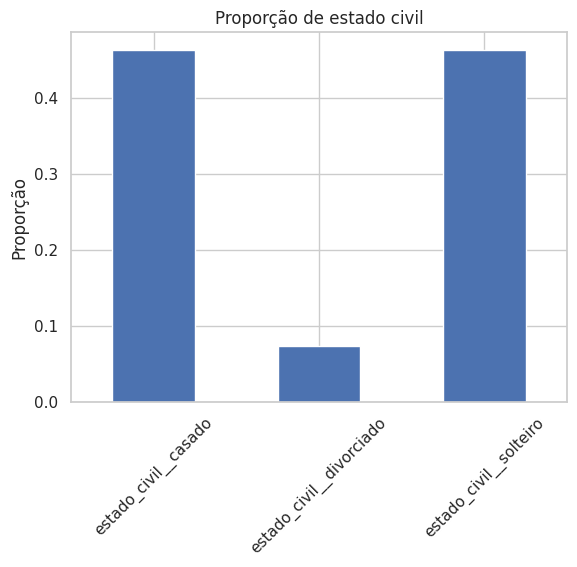

In [509]:
## grafico de proporção de estado civil.

# Codificar variáveis binárias

dados_binarios = base.copy()
dados_binarios['estado_civil__casado'] = base['estado_civil__casado'].astype(int)
dados_binarios['estado_civil__divorciado'] = base['estado_civil__divorciado'].astype(int)
dados_binarios['estado_civil__solteiro'] = base['estado_civil__solteiro'].astype(int)

# Calcular proporções
# Use a list to select multiple columns
proporcoes = base[['estado_civil__casado', 'estado_civil__divorciado', 'estado_civil__solteiro']].mean()

# Gráfico de Barras Empilhadas
proporcoes.plot(kind='bar', stacked=True)
plt.title('Proporção de estado civil')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()

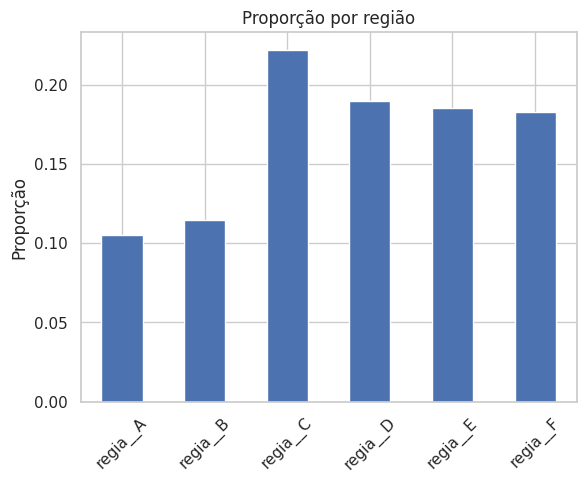

In [510]:
## grafico de proporção por região

# Codificar variáveis binárias

dados_binarios = base.copy()
dados_binarios['regia__A'] = base['regia__A'].astype(int)
dados_binarios['regia__B'] = base['regia__B'].astype(int)
dados_binarios['regia__C'] = base['regia__C'].astype(int)
dados_binarios['regia__D'] = base['regia__D'].astype(int)
dados_binarios['regia__E'] = base['regia__E'].astype(int)
dados_binarios['regia__F'] = base['regia__F'].astype(int)


# Calcular proporções
# Use a list to select multiple columns
proporcoes = base[['regia__A', 'regia__B', 'regia__C', 'regia__D', 'regia__E', 'regia__F',]].mean()

# Gráfico de Barras Empilhadas
proporcoes.plot(kind='bar', stacked=True)
plt.title('Proporção por região')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()

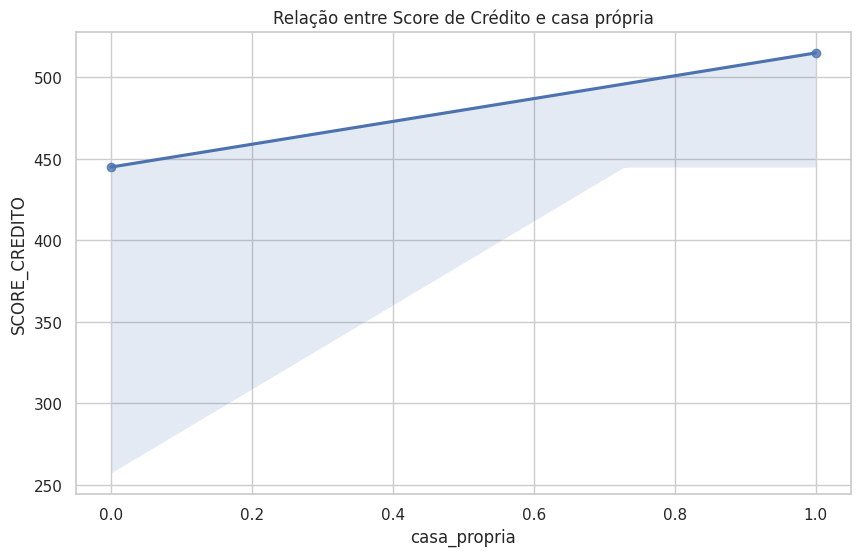

In [511]:
## grafico de relação de crédito e e ter casa própria.

plt.figure(figsize=(10, 6))

# Criar o gráfico de dispersão
dados = base.groupby('casa_propria')['SCORE_CREDITO'].mean()

# Remove NaN values before plotting
dados = dados.dropna()  # Drop rows with NaN values

sns.regplot(x=dados.index, y=dados.values)  # Use index as x and values as y

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Score de Crédito e casa própria')
plt.xlabel('casa_propria')
plt.ylabel('SCORE_CREDITO')

plt.show()

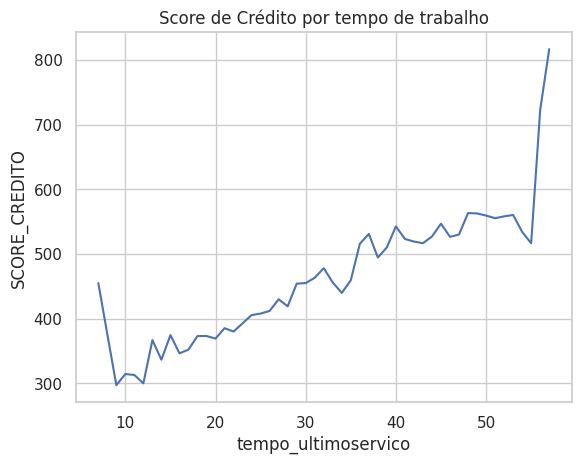

In [512]:
## grafico de relação de crédito e tempo de trabalho.

dados = base.groupby('tempo_ultimoservico')['SCORE_CREDITO'].mean()


sns.lineplot(data=dados,)
plt.title('Score de Crédito por tempo de trabalho')
plt.show()

# Correlação de Pearson

In [513]:
# verificando a correlação entre as váriaveis númericas

corr = base_numericos.corr(method='pearson')
corr

,SCORE_CREDITO,salario_mes,vl_imovel_em_mil,idade,tempo_ultimoservico,Qte_dependentes,Qte_cartoes,Qte_carros
SCORE_CREDITO,1.00,0.41,0.54,0.21,0.38,0.10,0.31,0.25
salario_mes,0.41,1.00,0.14,0.09,0.13,0.05,0.11,0.01
vl_imovel_em_mil,0.54,0.14,1.00,-0.03,0.08,0.09,0.16,0.03
idade,0.21,0.09,-0.03,1.00,0.77,-0.07,-0.02,0.05
tempo_ultimoservico,0.38,0.13,0.08,0.77,1.00,-0.05,0.05,-0.02
Qte_dependentes,0.10,0.05,0.09,-0.07,-0.05,1.00,-0.01,0.16
Qte_cartoes,0.31,0.11,0.16,-0.02,0.05,-0.01,1.00,-0.01
Qte_carros,0.25,0.01,0.03,0.05,-0.02,0.16,-0.01,1.00


Text(0.5, 1.0, 'Análise de Correlação')

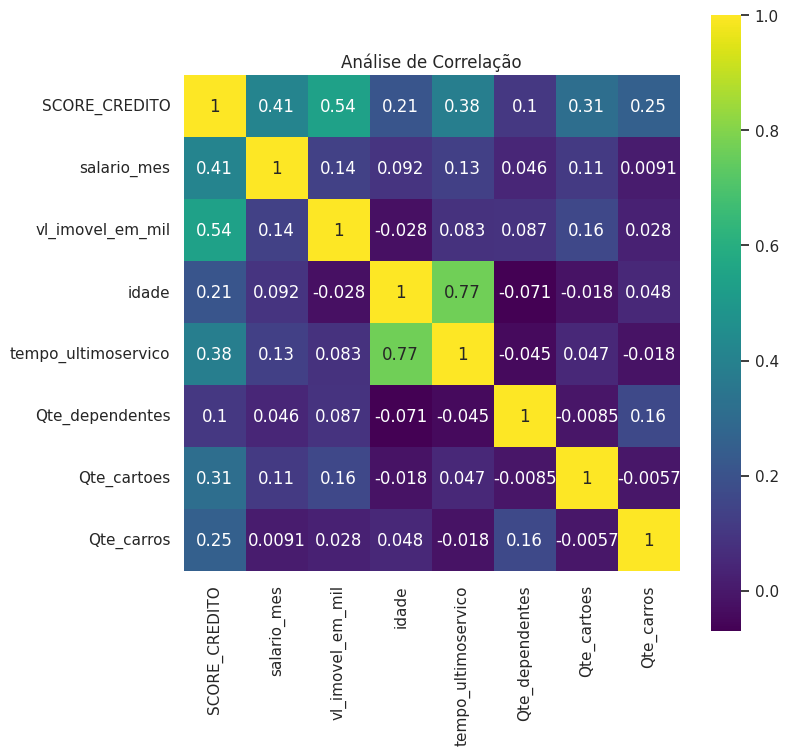

In [514]:
## Grafico de correlação de Pearson das variaveis númericas.

correlation = base_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Análise de Correlação')

Text(0.5, 1.0, 'Análise de Correlação')

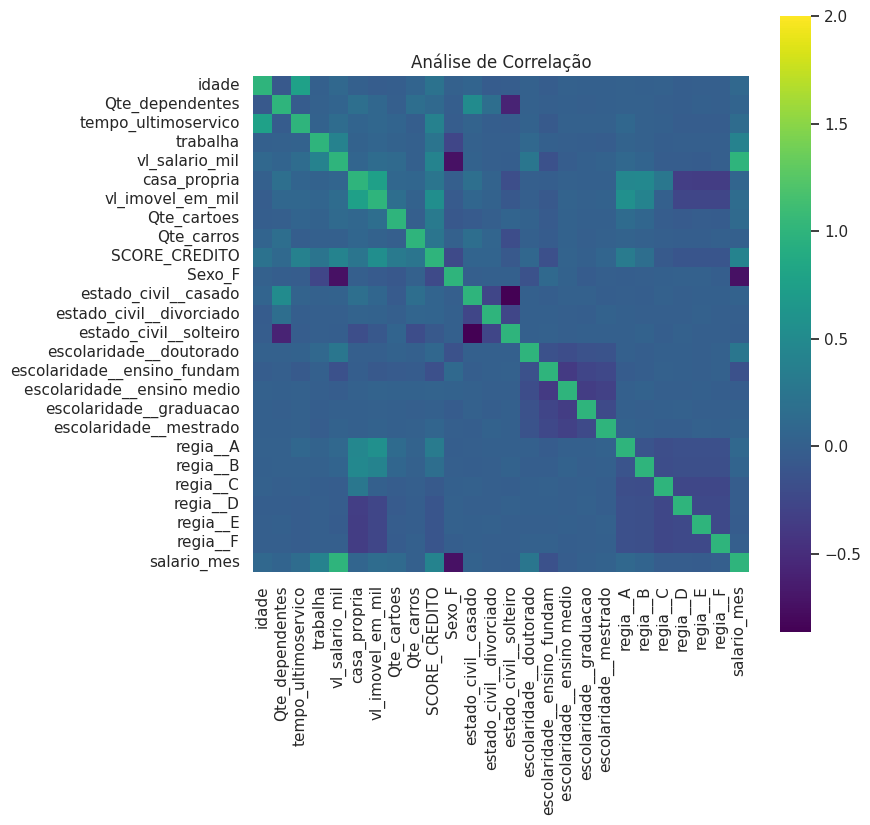

In [515]:
## Grafico de correlação de Pearson com todas variaveis.

correlation = base.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=2, square=True,annot=False,cmap='viridis')

plt.title('Análise de Correlação')

In [516]:
## verificando as correlações
correlation

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
idade,1.00,-0.07,0.77,0.01,0.09,0.01,-0.03,-0.02,0.05,0.21,...,0.01,0.01,0.01,0.02,-0.00,0.02,-0.02,-0.01,-0.00,0.09
Qte_dependentes,-0.07,1.00,-0.05,0.02,0.05,0.17,0.09,-0.01,0.16,0.10,...,0.00,-0.00,0.00,0.02,0.01,-0.01,-0.02,0.00,-0.00,0.05
tempo_ultimoservico,0.77,-0.05,1.00,0.03,0.13,0.04,0.08,0.05,-0.02,0.38,...,0.02,0.01,0.01,0.09,0.02,0.00,-0.03,-0.03,-0.03,0.13
trabalha,0.01,0.02,0.03,1.00,0.39,0.02,0.06,0.03,0.00,0.23,...,-0.01,-0.02,-0.03,0.04,0.01,-0.02,-0.01,-0.01,-0.00,0.39
vl_salario_mil,0.09,0.05,0.13,0.39,1.00,0.06,0.14,0.11,0.01,0.41,...,-0.03,0.00,0.03,0.09,0.05,-0.03,-0.03,-0.04,-0.00,1.00
casa_propria,0.01,0.17,0.04,0.02,0.06,1.00,0.75,0.08,0.07,0.25,...,0.01,0.01,0.00,0.46,0.47,0.27,-0.34,-0.35,-0.35,0.06
vl_imovel_em_mil,-0.03,0.09,0.08,0.06,0.14,0.75,1.00,0.16,0.03,0.54,...,0.03,0.01,0.03,0.56,0.42,0.00,-0.26,-0.26,-0.26,0.14
Qte_cartoes,-0.02,-0.01,0.05,0.03,0.11,0.08,0.16,1.00,-0.01,0.31,...,0.02,-0.00,-0.00,0.13,0.07,-0.03,-0.05,-0.03,-0.04,0.11
Qte_carros,0.05,0.16,-0.02,0.00,0.01,0.07,0.03,-0.01,1.00,0.25,...,0.02,-0.00,0.02,0.03,0.01,-0.00,-0.02,-0.02,0.00,0.01
SCORE_CREDITO,0.21,0.10,0.38,0.23,0.41,0.25,0.54,0.31,0.25,1.00,...,0.04,0.01,0.06,0.31,0.17,-0.06,-0.10,-0.11,-0.10,0.41


Correlação de Pearson - quando as variáveis são núméricas quantitativas

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


In [517]:
##Correlações fortes

results = [(index, col) for index, row in correlation.iterrows() for col, value in row.items() if 0.9 > value > 0.7]

print(results)

[('idade', 'tempo_ultimoservico'), ('tempo_ultimoservico', 'idade'), ('casa_propria', 'vl_imovel_em_mil'), ('vl_imovel_em_mil', 'casa_propria')]


In [518]:
##Correlações muito fortes

results = [(index, col) for index, row in correlation.iterrows() for col, value in row.items() if value > 0.8]

print(results)

[('idade', 'idade'), ('Qte_dependentes', 'Qte_dependentes'), ('tempo_ultimoservico', 'tempo_ultimoservico'), ('trabalha', 'trabalha'), ('vl_salario_mil', 'vl_salario_mil'), ('vl_salario_mil', 'salario_mes'), ('casa_propria', 'casa_propria'), ('vl_imovel_em_mil', 'vl_imovel_em_mil'), ('Qte_cartoes', 'Qte_cartoes'), ('Qte_carros', 'Qte_carros'), ('SCORE_CREDITO', 'SCORE_CREDITO'), ('Sexo_F', 'Sexo_F'), ('estado_civil__casado', 'estado_civil__casado'), ('estado_civil__divorciado', 'estado_civil__divorciado'), ('estado_civil__solteiro', 'estado_civil__solteiro'), ('escolaridade__doutorado', 'escolaridade__doutorado'), ('escolaridade__ensino_fundam', 'escolaridade__ensino_fundam'), ('escolaridade__ensino medio', 'escolaridade__ensino medio'), ('escolaridade__graduacao', 'escolaridade__graduacao'), ('escolaridade__mestrado', 'escolaridade__mestrado'), ('regia__A', 'regia__A'), ('regia__B', 'regia__B'), ('regia__C', 'regia__C'), ('regia__D', 'regia__D'), ('regia__E', 'regia__E'), ('regia__F',

**As principais correlações identificadas foram entre:**

idade e tempo de serviço.

Região A e valor do imóvel.

Região B e valor do imóvel.

estado civi casado e número de dependentes.

**Outras correlações fracas identificadas:**

Score e salário.

Score e idade.

Score e tempo de serviço.

Dessa forma já conseguimos identificar uma leve tendência de influência de idade, salário e tempo de serviço na pontuação de crédito.

Também conseguimos verificar que a Região A e B obtem maiores números de pessoas com imóvel próprio.

# Qui-quadrado

In [519]:
# Criar uma variável categórica
##Separando pelos percentiles

Q1 =  np.percentile(base['SCORE_CREDITO'], 25)
Q2 =  np.percentile(base['SCORE_CREDITO'], 50)
Q3 =  np.percentile(base['SCORE_CREDITO'], 75)
maximo = max(base['SCORE_CREDITO'])
print(Q1, Q2, Q3, maximo)

375.0 449.6 540.9 979.65


In [520]:
## criando a faixa categorica

base.loc[(base.SCORE_CREDITO >= 0) & (base.SCORE_CREDITO <= Q1), 'fx_score']=1.0
base.loc[(base.SCORE_CREDITO > Q1) & (base.SCORE_CREDITO <= Q2), 'fx_score']=2.0
base.loc[(base.SCORE_CREDITO>  Q2)  & (base.SCORE_CREDITO <=Q3), 'fx_score']=3.0
base.loc[(base.SCORE_CREDITO >  Q3) & (base.SCORE_CREDITO <= maximo), 'fx_score']=4.0

<ipython-input-521-e3b884c4f959>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fx_score', y='SCORE_CREDITO', data=base, palette='hls')


<Axes: xlabel='fx_score', ylabel='SCORE_CREDITO'>

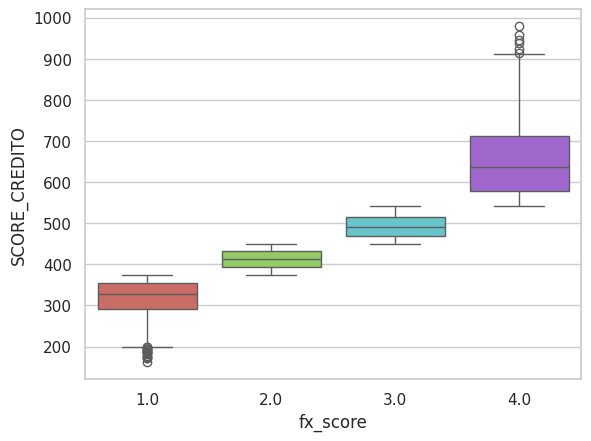

In [521]:
# Boxplot da variável SCORE_CREDITO versus a variável categoria de trabalha

sns.boxplot(x='fx_score', y='SCORE_CREDITO', data=base, palette='hls')

In [522]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        10127 non-null  int64  
 1   Qte_dependentes              10127 non-null  int64  
 2   tempo_ultimoservico          10127 non-null  int64  
 3   trabalha                     10127 non-null  int64  
 4   vl_salario_mil               10127 non-null  float64
 5   casa_propria                 10127 non-null  int64  
 6   vl_imovel_em_mil             10127 non-null  int64  
 7   Qte_cartoes                  10127 non-null  int64  
 8   Qte_carros                   10127 non-null  int64  
 9   SCORE_CREDITO                10127 non-null  float64
 10  Sexo_F                       10127 non-null  int64  
 11  estado_civil__casado         10127 non-null  int64  
 12  estado_civil__divorciado     10127 non-null  int64  
 13  estado_civil__so

In [523]:
## crosstab entre quantidade de carros e a faixa de score.

pd.crosstab(base.fx_score,base.Qte_carros, margins=True)

Qte_carros,0,1,2,All
fx_score,,,,
1.0,1499,1039,7,2545
2.0,1156,1310,53,2519
3.0,836,1593,109,2538
4.0,778,1461,286,2525
All,4269,5403,455,10127


# Teste de Hipótese

In [524]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
!pip install researchpy
import researchpy

### Abaixo Realizamos diversos testes de relação qui-quadrado entre as variáveis categoricas binárias.

H0: não há relação entre as variáveis.

H1: há relação entre as variáveis.

α = 0,05 (5%)

In [525]:
results1 = researchpy.crosstab(base['fx_score'],base['trabalha'], test='chi-square')
results1

(         trabalha             
 trabalha        0     1    All
 fx_score                      
 1.0           478  2067   2545
 2.0           283  2236   2519
 3.0           116  2422   2538
 4.0            15  2510   2525
 All           892  9235  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    602.49
 1                    p-value =      0.00
 2                 Cramer's V =      0.24)

In [526]:
results1 = researchpy.crosstab(base['fx_score'],base['casa_propria'], test='chi-square')
results1

(             casa_propria             
 casa_propria            0     1    All
 fx_score                              
 1.0                  1891   654   2545
 2.0                  1763   756   2519
 3.0                  1744   794   2538
 4.0                  1160  1365   2525
 All                  6558  3569  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    540.96
 1                    p-value =      0.00
 2                 Cramer's V =      0.23)

In [527]:
results1 = researchpy.crosstab(base['fx_score'],base['Sexo_F'], test='chi-square')
results1

(         Sexo_F             
 Sexo_F        0     1    All
 fx_score                    
 1.0         974  1571   2545
 2.0        1005  1514   2519
 3.0        1152  1386   2538
 4.0        1638   887   2525
 All        4769  5358  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    455.12
 1                    p-value =      0.00
 2                 Cramer's V =      0.21)

Teste de relação de Score por cada estado civil

In [528]:
results1 = researchpy.crosstab(base['fx_score'],base['estado_civil__casado'], test='chi-square')
results1

(                     estado_civil__casado             
 estado_civil__casado                    0     1    All
 fx_score                                              
 1.0                                  1418  1127   2545
 2.0                                  1374  1145   2519
 3.0                                  1345  1193   2538
 4.0                                  1303  1222   2525
 All                                  5440  4687  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =      9.86
 1                    p-value =      0.02
 2                 Cramer's V =      0.03)

In [529]:
results1 = researchpy.crosstab(base['fx_score'],base['estado_civil__solteiro'], test='chi-square')
results1

(                       estado_civil__solteiro             
 estado_civil__solteiro                      0     1    All
 fx_score                                                  
 1.0                                      1270  1275   2545
 2.0                                      1323  1196   2519
 3.0                                      1397  1141   2538
 4.0                                      1445  1080   2525
 All                                      5435  4692  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     30.65
 1                    p-value =      0.00
 2                 Cramer's V =      0.06)

In [530]:
results1 = researchpy.crosstab(base['fx_score'],base['estado_civil__divorciado'], test='chi-square')
results1

(                         estado_civil__divorciado            
 estado_civil__divorciado                        0    1    All
 fx_score                                                     
 1.0                                          2402  143   2545
 2.0                                          2341  178   2519
 3.0                                          2334  204   2538
 4.0                                          2302  223   2525
 All                                          9379  748  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     21.29
 1                    p-value =      0.00
 2                 Cramer's V =      0.05)

In [531]:
results1 = researchpy.crosstab(base['fx_score'],base['estado_civil__divorciado'], test='chi-square')
results1

(                         estado_civil__divorciado            
 estado_civil__divorciado                        0    1    All
 fx_score                                                     
 1.0                                          2402  143   2545
 2.0                                          2341  178   2519
 3.0                                          2334  204   2538
 4.0                                          2302  223   2525
 All                                          9379  748  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     21.29
 1                    p-value =      0.00
 2                 Cramer's V =      0.05)

Teste de relação de Score por escolaridade

In [532]:
results1 = researchpy.crosstab(base['fx_score'],base['escolaridade__ensino_fundam'], test='chi-square')
results1

(                            escolaridade__ensino_fundam             
 escolaridade__ensino_fundam                           0     1    All
 fx_score                                                            
 1.0                                                1809   736   2545
 2.0                                                1837   682   2519
 3.0                                                1954   584   2538
 4.0                                                2244   281   2525
 All                                                7844  2283  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    277.60
 1                    p-value =      0.00
 2                 Cramer's V =      0.17)

In [533]:
results1 = researchpy.crosstab(base['fx_score'],base['escolaridade__ensino medio'], test='chi-square')
results1

(                           escolaridade__ensino medio             
 escolaridade__ensino medio                          0     1    All
 fx_score                                                          
 1.0                                              1754   791   2545
 2.0                                              1718   801   2519
 3.0                                              1707   831   2538
 4.0                                              1596   929   2525
 All                                              6775  3352  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     22.30
 1                    p-value =      0.00
 2                 Cramer's V =      0.05)

In [534]:
results1 = researchpy.crosstab(base['fx_score'],base['escolaridade__graduacao'], test='chi-square')
results1

(                        escolaridade__graduacao             
 escolaridade__graduacao                       0     1    All
 fx_score                                                    
 1.0                                        2032   513   2545
 2.0                                        1996   523   2519
 3.0                                        2019   519   2538
 4.0                                        1986   539   2525
 All                                        8033  2094  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =      1.20
 1                    p-value =      0.75
 2                 Cramer's V =      0.01)

In [535]:
results1 = researchpy.crosstab(base['fx_score'],base['escolaridade__doutorado'], test='chi-square')
results1

(                        escolaridade__doutorado            
 escolaridade__doutorado                       0    1    All
 fx_score                                                   
 1.0                                        2415  130   2545
 2.0                                        2365  154   2519
 3.0                                        2328  210   2538
 4.0                                        2260  265   2525
 All                                        9368  759  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     62.85
 1                    p-value =      0.00
 2                 Cramer's V =      0.08)

In [536]:
results1 = researchpy.crosstab(base['fx_score'],base['escolaridade__mestrado'], test='chi-square')
results1

(                       escolaridade__mestrado             
 escolaridade__mestrado                      0     1    All
 fx_score                                                  
 1.0                                      2170   375   2545
 2.0                                      2160   359   2519
 3.0                                      2144   394   2538
 4.0                                      2014   511   2525
 All                                      8488  1639  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     42.28
 1                    p-value =      0.00
 2                 Cramer's V =      0.06)

Teste de relação de Score por cada região

In [537]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__A'], test='chi-square')
results1

(         regia__A             
 regia__A        0     1    All
 fx_score                      
 1.0          2441   104   2545
 2.0          2352   167   2519
 3.0          2339   199   2538
 4.0          1930   595   2525
 All          9062  1065  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    628.37
 1                    p-value =      0.00
 2                 Cramer's V =      0.25)

In [538]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__B'], test='chi-square')
results1

(         regia__B             
 regia__B        0     1    All
 fx_score                      
 1.0          2365   180   2545
 2.0          2306   213   2519
 3.0          2291   247   2538
 4.0          2001   524   2525
 All          8963  1164  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    292.27
 1                    p-value =      0.00
 2                 Cramer's V =      0.17)

In [539]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__C'], test='chi-square')
results1

(         regia__C             
 regia__C        0     1    All
 fx_score                      
 1.0          1944   601   2545
 2.0          1887   632   2519
 3.0          1981   557   2538
 4.0          2067   458   2525
 All          7879  2248  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     39.34
 1                    p-value =      0.00
 2                 Cramer's V =      0.06)

In [540]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__D'], test='chi-square')
results1

(         regia__D             
 regia__D        0     1    All
 fx_score                      
 1.0          1959   586   2545
 2.0          2013   506   2519
 3.0          2038   500   2538
 4.0          2194   331   2525
 All          8204  1923  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     86.52
 1                    p-value =      0.00
 2                 Cramer's V =      0.09)

In [541]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__E'], test='chi-square')
results1

(         regia__E             
 regia__E        0     1    All
 fx_score                      
 1.0          2001   544   2545
 2.0          2019   500   2519
 3.0          2019   519   2538
 4.0          2212   313   2525
 All          8251  1876  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     85.69
 1                    p-value =      0.00
 2                 Cramer's V =      0.09)

In [542]:
results1 = researchpy.crosstab(base['fx_score'],base['regia__F'], test='chi-square')
results1

(         regia__F             
 regia__F        0     1    All
 fx_score                      
 1.0          2015   530   2545
 2.0          2018   501   2519
 3.0          2022   516   2538
 4.0          2221   304   2525
 All          8276  1851  10127,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =     88.38
 1                    p-value =      0.00
 2                 Cramer's V =      0.09)